In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('/content/iris_virginica.csv')

In [ ]:
df1=pd.read_csv('/content/SeoulBikeData.csv',encoding='latin1')

In [ ]:
df.head()


,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,101,6.3,3.3,6.0,2.5,Iris-virginica
1,102,5.8,2.7,5.1,1.9,Iris-virginica
2,103,7.1,3.0,5.9,2.1,Iris-virginica
3,104,6.3,2.9,5.6,1.8,Iris-virginica
4,105,6.5,3.0,5.8,2.2,Iris-virginica


In [ ]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.isna().sum()

Id                   0
Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Species              0
dtype: int64

In [ ]:
df1.isna().sum()

Date                          0
Rented Bike Count             0
Hour                          0
Temperature(°C)               0
Humidity(%)                   0
Wind speed (m/s)              0
Visibility (10m)              0
Dew point temperature(°C)     0
Solar Radiation (MJ/m2)      24
Rainfall(mm)                 42
Snowfall (cm)                18
Seasons                       0
Holiday                       0
Functioning Day               0
dtype: int64

In [ ]:
df1.shape

(8760, 14)

In [ ]:
df1=df1.dropna()

In [ ]:
df1.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df1.shape

(8687, 14)

In [ ]:
df.rename(columns = {'Sepal Length (cm)':'slength'}, inplace = True)
df.rename(columns = {'Sepal Width (cm)':'swidth'}, inplace = True)

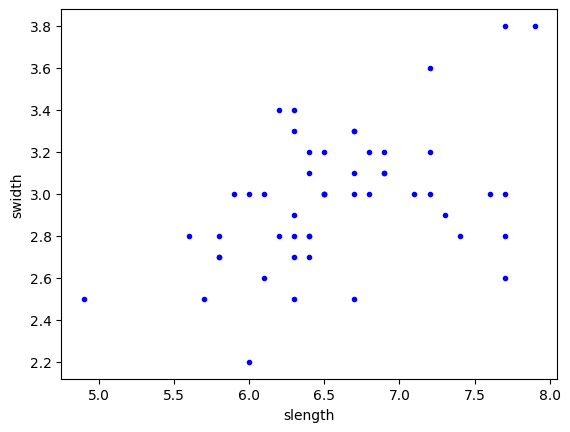

In [ ]:
%matplotlib inline
plt.xlabel('slength')
plt.ylabel('swidth')
plt.scatter(df.slength,df.swidth,color='blue',marker='.')

In [ ]:
X = np.array(df['slength']).reshape(-1, 1)
y = np.array(df['swidth']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.22640843138545674


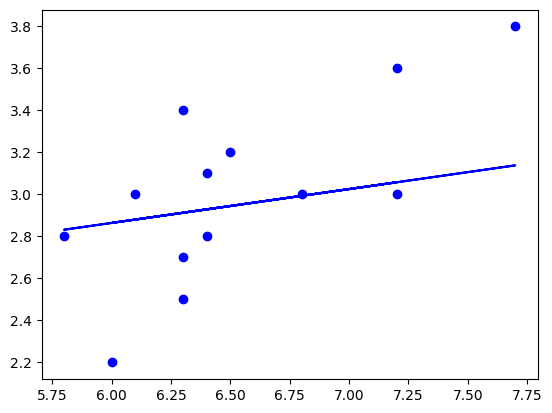

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='b')
plt.show()

In [ ]:
df1['Seasons'] = df1['Seasons'].replace('Winter', '1')
df1['Seasons'] = df1['Seasons'].replace('Autumn', '2')
df1['Seasons'] = df1['Seasons'].replace('Summer', '3')
df1['Seasons'] = df1['Seasons'].replace('Spring', '4')

In [ ]:
df1['Seasons'] = df1['Seasons'].astype(float)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8687 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8687 non-null   object 
 1   Rented Bike Count          8687 non-null   int64  
 2   Hour                       8687 non-null   int64  
 3   Temperature(°C)            8687 non-null   float64
 4   Humidity(%)                8687 non-null   int64  
 5   Wind speed (m/s)           8687 non-null   float64
 6   Visibility (10m)           8687 non-null   int64  
 7   Dew point temperature(°C)  8687 non-null   float64
 8   Solar Radiation (MJ/m2)    8687 non-null   float64
 9   Rainfall(mm)               8687 non-null   float64
 10  Snowfall (cm)              8687 non-null   float64
 11  Seasons                    8687 non-null   float64
 12  Holiday                    8687 non-null   object 
 13  Functioning Day            8687 non-null   objec

In [ ]:
# input
x = df1.iloc[:, 3].values

# output
y = df1.iloc[:, 11].values

In [ ]:
X = np.array(x).reshape(-1, 1)
Y = np.array(y).reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)

print (xtrain[0:10, :])

[[-1.02674049]
 [ 0.47241483]
 [-1.50412515]
 [-0.7503599 ]
 [-0.91786329]
 [ 0.53104102]
 [-0.74198473]
 [ 1.04192635]
 [ 0.79904644]
 [ 1.41880898]]


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[466   0   0  67]
 [ 35 135 106 264]
 [  0  61 488   0]
 [ 63 137  83 267]]


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6243093922651933
